In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


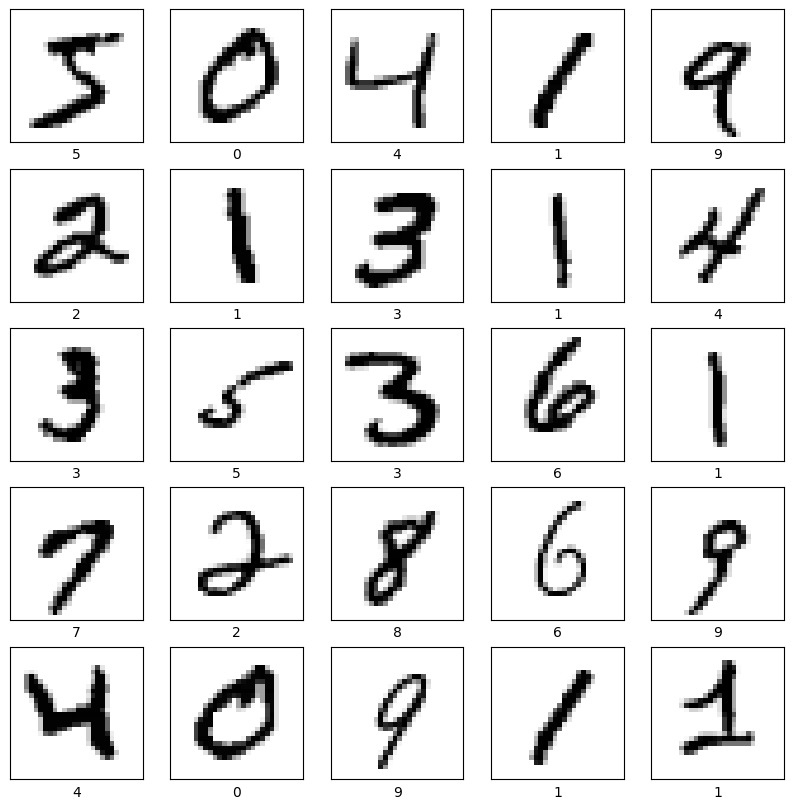

c:\Users\kake\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8994 - loss: 0.3357 - val_accuracy: 0.9858 - val_loss: 0.0425
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9864 - loss: 0.0465 - val_accuracy: 0.9903 - val_loss: 0.0302
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9902 - loss: 0.0322 - val_accuracy: 0.9915 - val_loss: 0.0298
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.9933 - loss: 0.0224 - val_accuracy: 0.9919 - val_loss: 0.0254
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9944 - loss: 0.0175 - val_accuracy: 0.9898 - val_loss: 0.0346
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9867 - loss: 0.0439
Test accuracy: 0.989799976348877


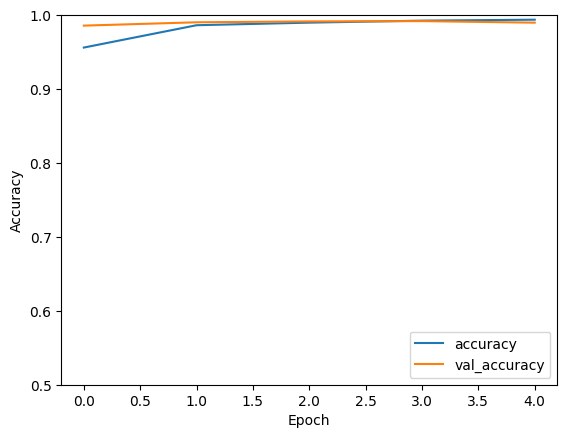

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


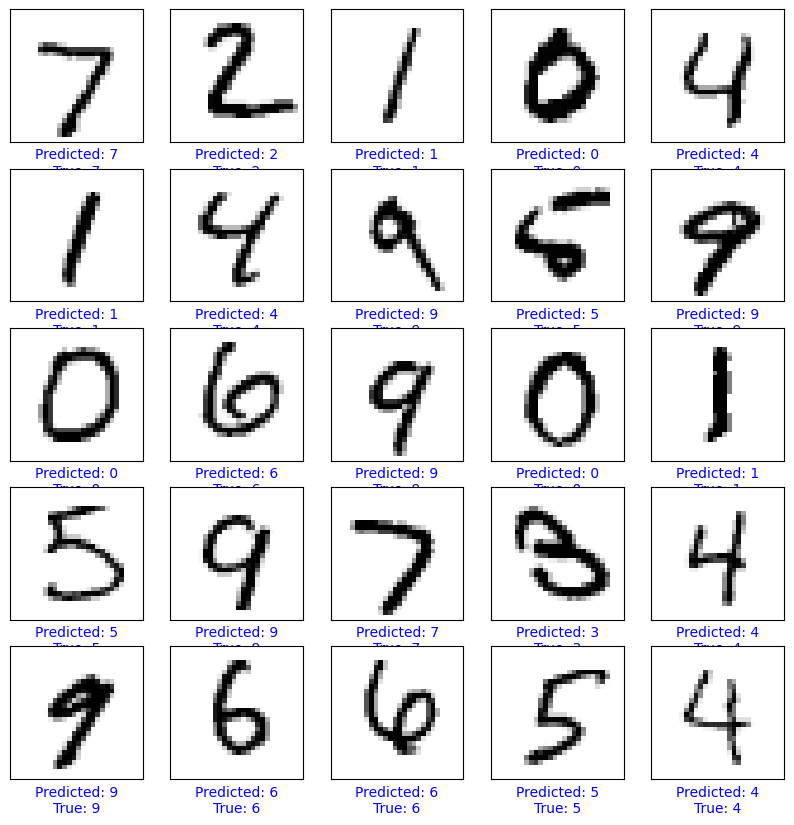

In [3]:
# Operação de Convolução com Filtro 3x3 em uma Matriz 5x5
input_matrix = np.array([[1, 2, 3, 0, 1], 
                         [4, 5, 6, 1, 2], 
                         [7, 8, 9, 0, 1], 
                         [0, 1, 2, 3, 4], 
                         [1, 2, 3, 4, 5]])
filter_matrix = np.array([[1, 0, -1], 
                          [1, 0, -1], 
                          [1, 0, -1]])
output_matrix = np.zeros((3, 3))
for i in range(3):
    for j in range(3):
        region = input_matrix[i:i+3, j:j+3]
        output_matrix[i, j] = np.sum(region * filter_matrix)

# Max Pooling 2x2 em uma Matriz 4x4
input_matrix = np.array([[1, 3, 2, 4], 
                         [5, 6, 1, 2], 
                         [7, 8, 9, 1], 
                         [0, 1, 3, 0]])
output_matrix = np.zeros((2, 2))
for i in range(2):
    for j in range(2):
        region = input_matrix[i * 2:i * 2 + 2, j * 2:j * 2 + 2]
        output_matrix[i, j] = np.max(region)

# Carregando e Pré-processando o Dataset MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
class_names = [str(i) for i in range(10)]

# Visualização de Imagens do Conjunto de Treinamento
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Construção e Compilação do Modelo CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Treinamento do Modelo
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Avaliação do Modelo
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Visualização da Acurácia e Perda
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# Geração de Previsões e Visualização dos Resultados
predictions = model.predict(test_images)
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f'Predicted: {predicted_label}\nTrue: {true_label}', color=color)
plt.show()